In [1]:
!pip install lazypredict scikit-learn pandas seaborn matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 11.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from lazypredict.Supervised import LazyRegressor
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("vehicle_price.csv")
print(df.shape)
df.head()

Saving vehicle_price.csv to vehicle_price (1).csv
(1002, 17)


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.00,24V GDI DOHC Twin Turbo,6.00,Gasoline,10.00,8-Speed Automatic,Series II,SUV,4.00,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.00,OHV,6.00,Gasoline,1.00,8-Speed Automatic,Laredo,SUV,4.00,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.00,"6.2L V-8 gasoline direct injection, variable v...",8.00,Gasoline,0.00,Automatic,Denali,SUV,4.00,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.00,16V MPFI OHV,8.00,Gasoline,32.00,8-Speed Automatic,Pursuit,SUV,4.00,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.00,24V DDI OHV Turbo Diesel,6.00,Diesel,10.00,6-Speed Automatic,Laramie,Pickup Truck,4.00,Silver,Black,Four-wheel Drive


In [9]:
#preprocessing
df = df.dropna(subset=['price'])
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)  # For strings
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
# Split features & target
X = df.drop('price', axis=1)
y = df['price']
# Standardize numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
#Train and test spliting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#LazyPredict Regressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
# Sort by R² score
models_sorted = models.sort_values(by="R-Squared", ascending=False)
models_sorted.head(10)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 487
[LightGBM] [Info] Number of data points in the train set: 783, number of used features: 13
[LightGBM] [Info] Start training from score 50193.708812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.82,0.83,7187.41,0.31
HistGradientBoostingRegressor,0.79,0.81,7682.06,0.21
XGBRegressor,0.79,0.80,7773.98,1.02
LGBMRegressor,0.79,0.80,7811.82,0.07
BaggingRegressor,0.75,0.77,8433.77,0.07
RandomForestRegressor,0.73,0.75,8797.34,0.84
GradientBoostingRegressor,0.69,0.71,9346.15,0.27
ExtraTreeRegressor,0.61,0.64,10521.25,0.02
KNeighborsRegressor,0.41,0.45,12967.23,0.03


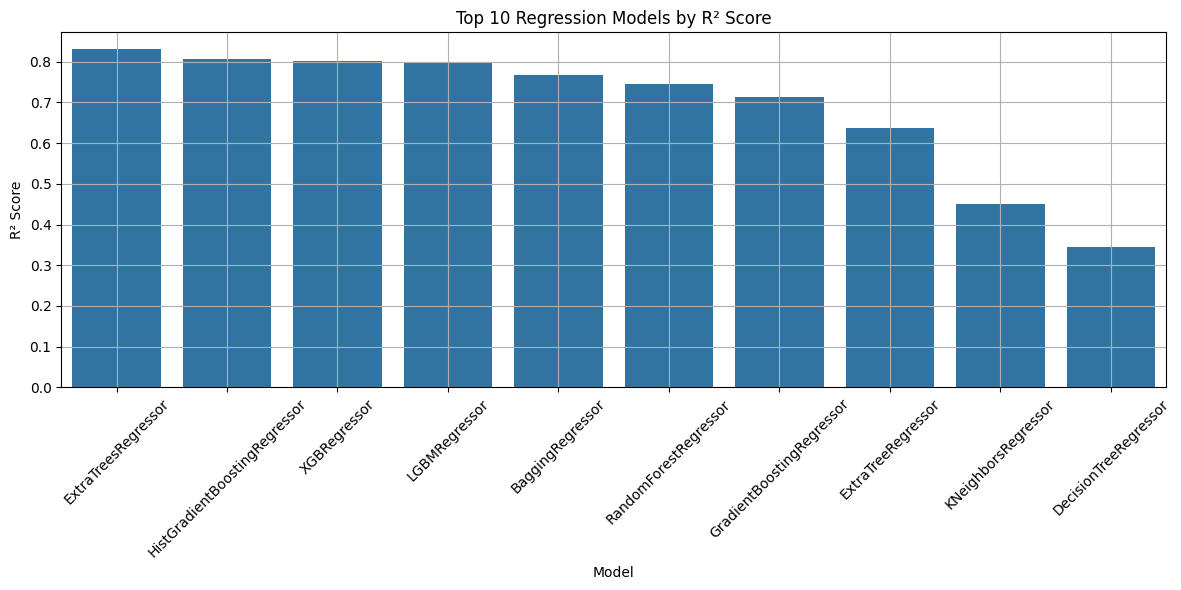

In [13]:
#Visualisation
top_models = models_sorted.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_models.index, y=top_models["R-Squared"])
plt.title("Top 10 Regression Models by R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
#Best model training
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8021066658684135
RMSE: 7773.977089468948


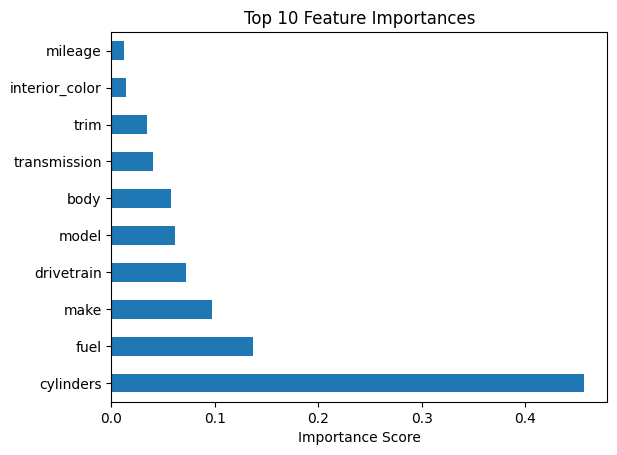

In [15]:
#Feature importance
feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()
